In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("simu_20000_0.1_90_140_train.npy")
a = data[0, :1000];

Fs = 100    # 采样率是 100Hz
t = np.arange(0, 10, 1/Fs)    # 时域上采样 10s 分成1000个数据点

FileNotFoundError: [Errno 2] No such file or directory: 'simu_20000_0.1_90_140_train.npy'

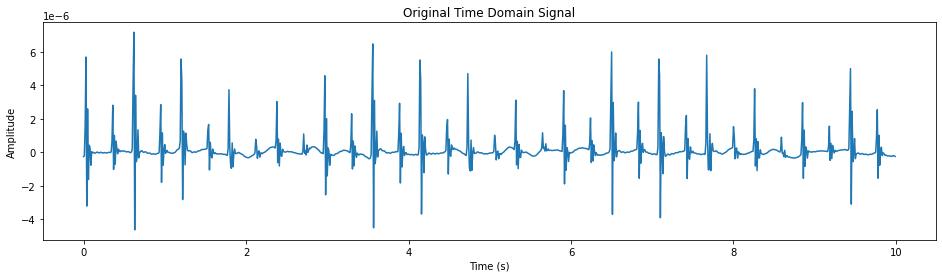

In [2]:
plt.figure(figsize=[16, 4])
plt.plot(t, a)
plt.title("Original Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [24]:
X = np.fft.fft(a)    # 对时域信号进行 fft 变换
freqs = np.fft.fftfreq(len(a), 1/Fs)    # 计算对应的频率

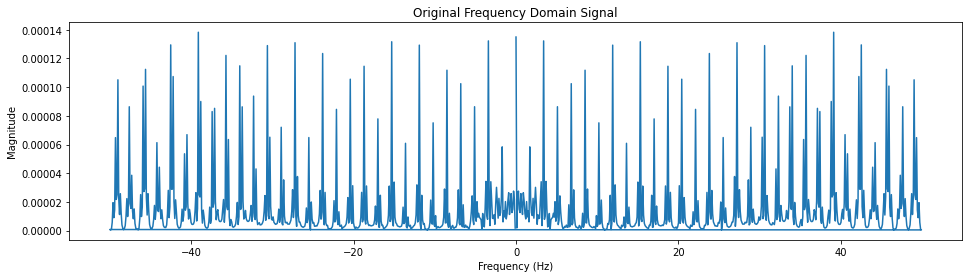

In [25]:
plt.figure(figsize=[16, 4])
plt.plot(freqs, np.abs(X))
plt.title("Original Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [33]:
# threshold = np.sort(np.abs(X))[::-1][50]
# idx = np.where(np.abs(X) < threshold)
# X[idx] = 0

threshold = 0.00002    # 所有幅度小于  的频率将被置零
# 找到幅度小于 threshold 的频率的索引
idx = np.where(np.abs(X) < threshold)[0]
# 将这些频率对应的幅度设为 0
X[idx] = 0

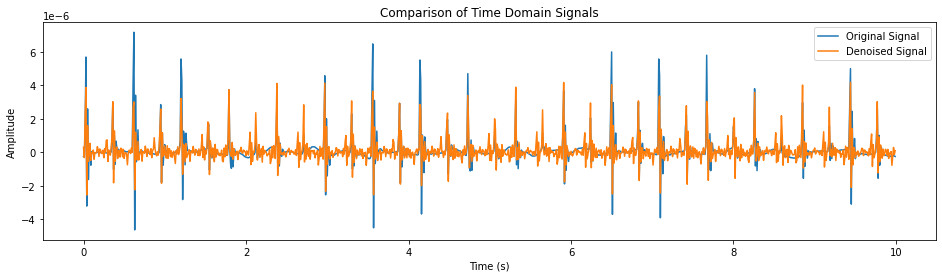

In [34]:
a_denoise = np.fft.ifft(X).real
plt.figure(figsize=[16, 4])
plt.plot(t, a, label="Original Signal")
plt.plot(t, a_denoise, label="Denoised Signal")
plt.title("Comparison of Time Domain Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

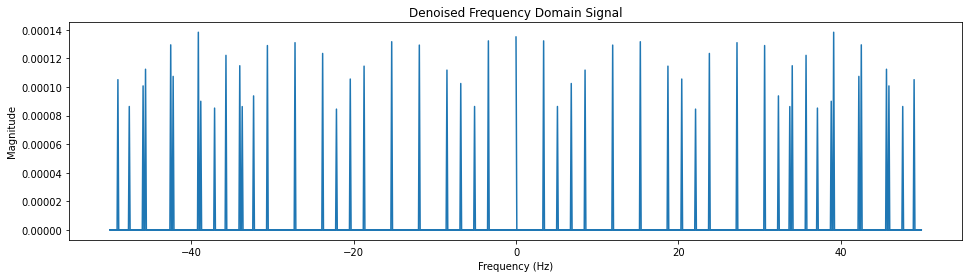

In [49]:
plt.figure(figsize=[16, 4])
plt.plot(freqs, np.abs(X))
plt.title("Denoised Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

[[ 1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]


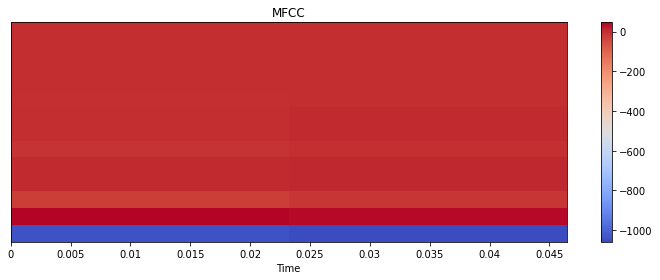

In [30]:
import librosa
import sklearn
from sklearn import preprocessing
import librosa.display
import matplotlib.pyplot as plt


A = np.load("simu_10000_0.1_141_178_test.npy")[0]
# 提取MFCC特征
mfccs = librosa.feature.mfcc(y=A, sr=100, n_mfcc=13, n_fft=512)

# 对MFCC系数进行归一化处理
normalized_mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

print(normalized_mfccs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [51]:
import pywt
print(pywt.__file__)

/root/miniconda3/lib/python3.8/site-packages/pywt/__init__.py


In [55]:
a = np.load("simu_20000_0.1_90_140_train.npy")
b = np.load("simu_10000_0.1_141_178_test.npy")

In [58]:
a[:,-2]

array([ 91., 101., 131., ...,  91., 112., 110.])

In [59]:
b[:,-2]

array([172., 173., 146., ..., 155., 159., 164.])

In [8]:
tmp = np.load("./data/features_test.npy")
tmp[888, 0]

32.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
feature_train = np.load("./data/features_test.npy")

In [4]:
feature_train.shape

(10000, 13)

In [5]:
print(feature_train[1,:])

[4.16250000e+01 8.30000000e+01 5.49085223e-06 1.65190621e-06
 2.28283584e-06 7.16421032e-07 1.56641481e-06 8.69886862e-06
 2.58739140e-06 3.40849598e-02 1.25494587e-01 5.14723259e-01
 4.00891024e-01]


In [ ]:
import tsfel